In [1]:
import os, sys, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
# Create timestamp to show when this summary was run
print('Summary run: ' + time.strftime("%a, %d %b %Y %H:%M"))

Summary run: Wed, 16 Oct 2024 10:54


In [3]:
relative_path = '../../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### Daily | By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Arterial,"13,060,004","13,795,040","735,036",5.63%
Collector,"72,096","54,864","-17,232",-23.90%
Freeway,"46,455,221","46,586,992","131,771",0.28%
HOV,"246,053","290,354","44,301",18.00%
Ramp,"334,132","265,727","-68,405",-20.47%
Total,"60,167,506","60,992,977","825,471",1.37%


----
### Daily | By County

In [6]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"32,134,146","33,584,480","1,450,334",4.51%
Kitsap,"3,636,120","2,968,413","-667,707",-18.36%
Pierce,"12,521,558","12,760,535","238,977",1.91%
Snohomish,"11,875,682","11,679,549","-196,133",-1.65%
Total,"60,167,506","60,992,977","825,471",1.37%


----
### Daily | Scatterplots 

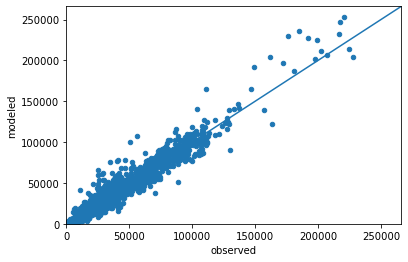

In [7]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

r^2: 0.9647073485231088


---
By County

King r^2: 0.9649539620719763
Kitsap r^2: 0.967504489970782
Pierce r^2: 0.9720790179465222
Snohomish r^2: 0.9494307229000939


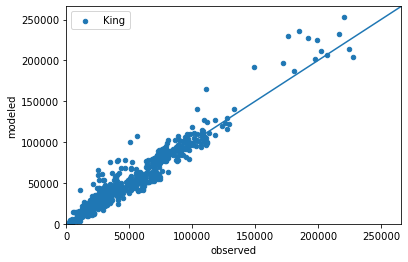

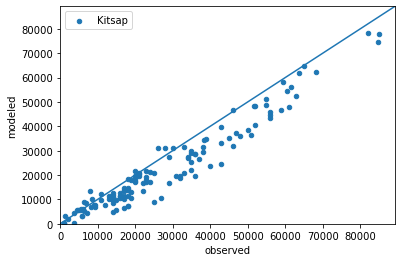

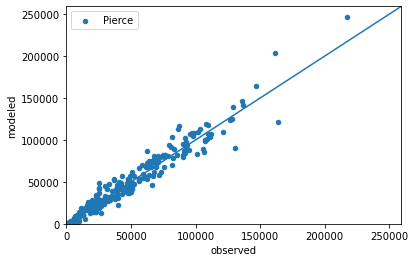

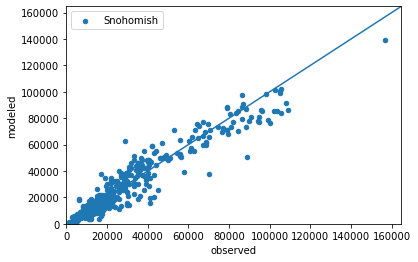

In [9]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print(str(county) + ' r^2: ' + str(r_value))

---
By Facility Type

r^2 Freeway: 0.9560648163516348


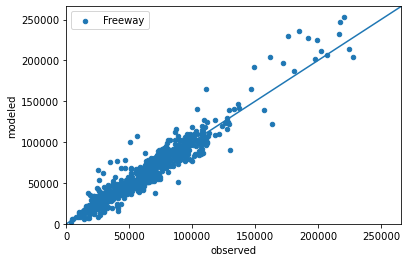

In [10]:
for factype in ['Freeway']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

**Hourly Volumes**


r^2: 0.6429828334356874


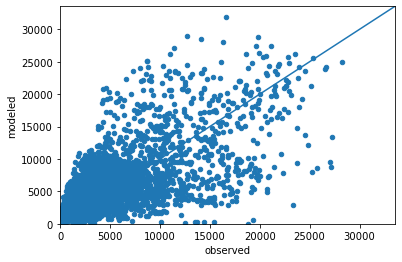

In [11]:
df = pd.read_csv(os.path.join(relative_path,'validation','hourly_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

# Screenlines

In [12]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,county,diff,percent_diff
0,AUBURN - SOUTH KING,"592,476","538,040",King,"-54,436",-9.19%
1,KENT,"559,335","502,388",King,"-56,947",-10.18%
2,SHIP CANAL,"480,070","531,475",King,"51,405",10.71%
3,SEATTLE - SOUTH OF CBD,"473,322","492,855",King,"19,533",4.13%
4,MILL CREEK,"391,447","377,731",King,"-13,716",-3.50%
5,SOUTH BELLEVUE,"389,700","374,515",King,"-15,185",-3.90%
6,KIRKLAND-REDMOND,"381,663","401,666",King,"20,003",5.24%
7,SEATTLE - NORTH,"356,051","367,485",King,"11,434",3.21%
8,TACOMA - EAST OF CBD,"324,463","355,134",Pierce,"30,671",9.45%
9,PARKLAND,"299,722","275,626",Pierce,"-24,096",-8.04%


r^2 : 0.9884148689029894


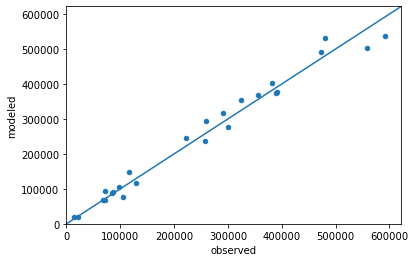

In [13]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2 : ' + str(r_value))

# Transit Boarding
----
### By Agency

In [14]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')

df[['observed_boardings','model_boardings','diff']] = df[['observed_boardings','model_boardings','diff']].astype('float')
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.sort_values('observed_boardings', ascending=False)

,agency,observed_boardings,model_boardings,diff,perc_diff
2,King County Metro,"253,314","325,074","71,761",28.33%
5,Sound Transit,"113,374","119,775","6,401",5.65%
0,Community Transit,"25,962","20,965","-4,997",-19.25%
4,Pierce Transit,"21,185","17,228","-3,957",-18.68%
6,Washington Ferries,"9,278","7,055","-2,223",-23.96%
3,Kitsap Transit,"8,258","15,358","7,100",85.98%
1,Everett Transit,"4,201","2,847","-1,354",-32.22%


----
### Key Routes
#### Ferries

In [15]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_boardings','model_boardings']] = df[['observed_boardings','model_boardings']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_boardings,model_boardings,diff,perc_diff
0,973 W Sea Water Taxi,759,344,-415,-54.71%
1,975 Vashn Water Taxi,338,431,93,27.46%
2,WSF Edmonds-Kingston,"1,500",182,"-1,318",-87.84%
3,WSF Seattle-Bain Isl,"5,514","4,997",-516,-9.36%
4,WSF Seattle-Brem,"1,189",247,-942,-79.24%
5,WSF Fauntleroy-Swrth,143,500,357,250.70%
6,WSF Fauntleroy-Vashn,560,787,227,40.51%
7,WSF Vashon-Southwrth,108,111,4,3.42%
8,WSF Pt Def-Tahlequah,265,230,-35,-13.18%


r^2 : 0.94428952752592


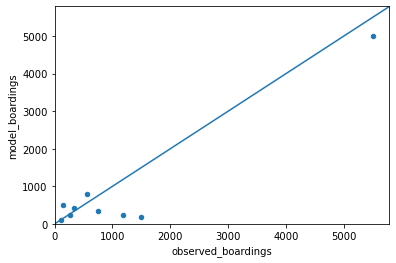

In [16]:
if len(_df) > 0:
    ax = _df.plot(kind='scatter', x='observed_boardings', y='model_boardings')
    lim = _df[['observed_boardings','model_boardings']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_boardings'],_df['model_boardings'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### Bikes on Ferries

In [17]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'bike_ferry_boardings.csv')
df['route_code'] = df['route_code'].astype('int')
df[['route_code','description', '@bvol']].sort_values('@bvol', ascending=False)

,route_code,description,@bvol
4,4202,Brem-Annapolis FF,537
2,4200,Seattle-Bremerton FF,430
3,4201,Brem-Pt Orchard FF,386
0,1973,973 W Sea Water Taxi,353
1,1975,975 Vashn Water Taxi,177
5,4203,Seattle-Kingston FF,170
12,5007,WSF Pt Def-Tahlequah,143
11,5005,WSF Fauntleroy-Vashn,119
8,5002,WSF Seattle-Bain Isl,103
10,5004,WSF Fauntleroy-Swrth,51


#### Rail

In [18]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_boardings','model_boardings']] = df[['observed_boardings','model_boardings']].astype('float')
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)

_df

,description,observed_boardings,model_boardings,diff,perc_diff
0,Link Red Line,"79,522","59,532","-19,990",-25.14%
1,Sounder South,"6,038","7,784","1,746",28.92%
2,Sounder North,316,5,-311,-98.55%


r^2 : 0.9984499075853136


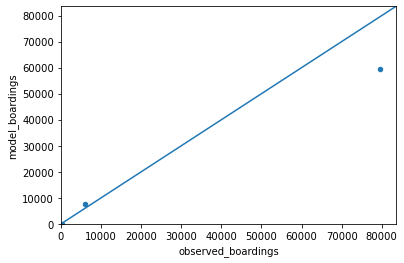

In [19]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_boardings', y='model_boardings')
    lim = _df[['observed_boardings','model_boardings']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_boardings'],_df['model_boardings'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### RapidRide, Busiest Buses, Streetcar

In [20]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('model_boardings', ascending=False)

,description,observed_boardings,model_boardings,diff,perc_diff
6,E Line RapidRide,"11,426","18,983","7,557",66.14%
4,C Line RapidRide,"7,250","12,575","5,325",73.45%
1,KC Metro 40,"7,208","11,186","3,978",55.18%
0,KC Metro 7,"9,954","10,632",678,6.81%
5,D Line RapidRide,"9,044","9,403",359,3.97%
10,Sound Transit 550,"3,351","8,805","5,454",162.75%
2,A Line RapidRide,"8,412","7,519",-893,-10.61%
7,F Line RapidRide,"4,748","6,406","1,658",34.93%
3,B Line RapidRide,"4,177","4,580",403,9.65%
9,First Hill Streetcar,"3,900","1,192","-2,708",-69.44%


r^2 : 0.8212065876490482


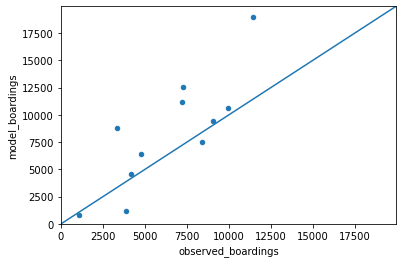

In [21]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_boardings', y='model_boardings')
    lim = _df[['observed_boardings','model_boardings']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_boardings'],_df['model_boardings'])
    print('r^2 ' + str('') + ': ' + str(r_value))

---
### Lines by Agency

r^2 Community Transit: 0.9348542614442655
r^2 Everett Transit: 0.9760077908917943
r^2 King County Metro: 0.9231708138327506
r^2 Kitsap Transit: 0.9271790661340328
r^2 Pierce Transit: 0.7450955363010308
r^2 Sound Transit: 0.9878796159748098
r^2 Washington Ferries: 0.9454625248931675


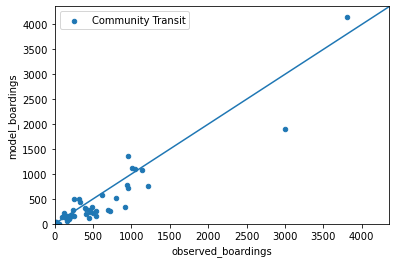

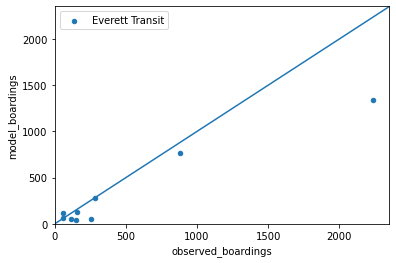

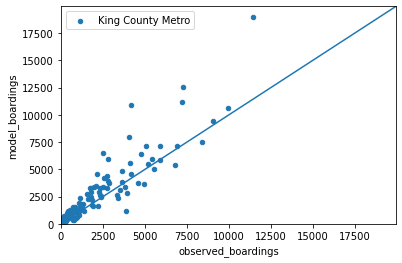

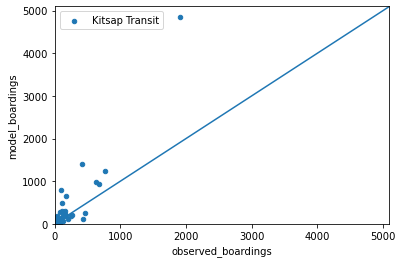

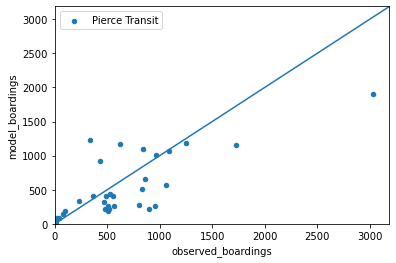

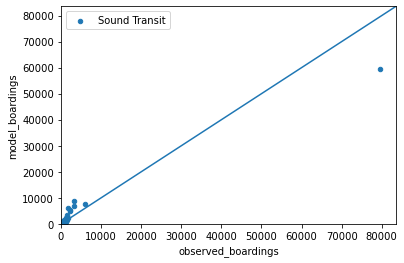

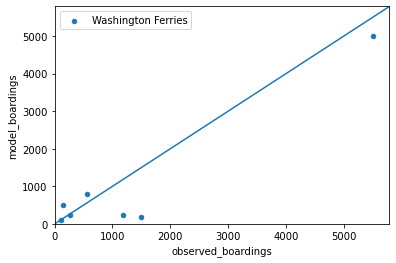

In [22]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    if (type(_df) == pd.core.frame.DataFrame) & (len(df) > 0):
        ax = _df.plot(kind='scatter', x='observed_boardings', y='model_boardings', label=agency)
        lim = _df[['observed_boardings','model_boardings']].max().max()*1.05
        ax.set_ylim(0,lim)
        ax.set_xlim(0,lim)
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x)
        slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_boardings'],_df['model_boardings'])
        print('r^2 ' + str(agency) + ': ' + str(r_value))

# Light Rail Station Boardings
----
Red Line

In [23]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['model_boardings']-df['observed_boardings']
df['percent_diff'] = df['diff']/df['observed_boardings']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,observed_boardings,model_boardings,diff,percent_diff
station_name,,,,
Husky Stadium,"6,134","3,278","-2,856",-46.56%
Westlake,"8,845","6,645","-2,200",-24.87%
University St,"4,324","4,281",-43,-0.99%
Pioneer Square,"2,400","3,878","1,478",61.60%
Int'l District,"4,399","1,339","-3,060",-69.56%
Capitol Hill,"7,667","4,880","-2,787",-36.36%
Stadium,"1,731",506,"-1,225",-70.79%
SODO,"1,669","2,538",869,52.07%
Beacon Hill,"2,147",900,"-1,247",-58.08%


Sound Transit Station Groupings

In [24]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_boardings','model_boardings']]
df_combined['diff'] = df_combined['model_boardings']-df_combined['observed_boardings']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_boardings']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_boardings,model_boardings,diff,percent_diff
station_group,,,,
Husky Stadium,"6,134","3,278","-2,856",-46.56%
Capitol Hill,"7,667","4,880","-2,787",-36.36%
Westlake/University St,"13,169","10,926","-2,243",-17.03%
Pioneer Square/Int'l District,"6,799","5,217","-1,582",-23.26%
Stadium/SODO,"3,400","3,044",-356,-10.48%
Beacon Hill/Mount Baker,"4,008","1,940","-2,068",-51.61%
Columbia City,"1,630",948,-682,-41.84%
Othello/Rainier Beach,"3,525","2,228","-1,297",-36.81%
Tukwila Int'l Blvd,"2,298","1,706",-592,-25.77%


# Stop Transfers

### Light Rail

In [25]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.90,-99.00,99.90,-100.91%
Westlake,0.16,0.36,-0.21,-57.02%
University St,0.27,0.20,0.07,33.89%
Pioneer Square,0.51,0.16,0.35,220.93%
Int'l District,0.66,0.45,0.21,47.10%
Capitol Hill,0.06,-99.00,99.06,-100.06%
Stadium,0.20,0.12,0.08,64.75%
SODO,0.42,0.31,0.11,34.07%
Beacon Hill,0.40,0.35,0.04,12.38%


# Externals

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')

pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,county,observed,modeled,diff
location,,,,,


# Corridor Speed

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

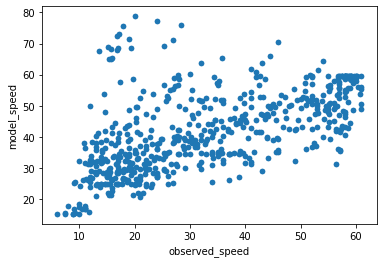

In [27]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df.plot(kind='scatter', y='model_speed', x='observed_speed')

### AM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

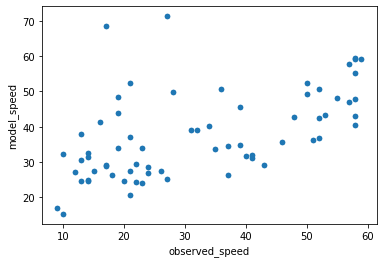

In [28]:
df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [29]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
6,Seattle to Everett - NB,43.05,58.00
15,Everett to Seattle - SB,25.11,27.00
24,Tacoma to Seattle - NB,27.04,24.00
33,Seattle to Tacoma - SB,40.52,58.00
42,Bellevue to Lynnwood - NB,47.16,57.00
51,Lynnwood to Bellevue - SB,24.23,22.00
60,Tukwila to Bellevue - NB,24.60,20.00
69,Bellevue to Tukwila - SB,29.08,43.00
78,Auburn to Renton - NB,29.40,22.00
87,Renton to Auburn - SB,48.03,55.00


### PM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

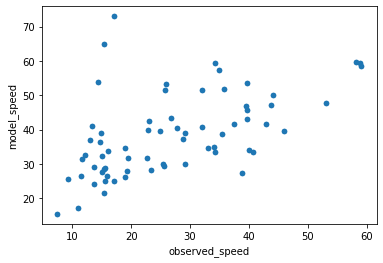

In [30]:
df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [31]:
df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
1,Seattle to Everett - NB,28.31,23.40
10,Everett to Seattle - SB,40.32,27.70
19,Tacoma to Seattle - NB,41.61,42.90
28,Seattle to Tacoma - SB,29.82,25.40
37,Bellevue to Lynnwood - NB,29.23,25.60
46,Lynnwood to Bellevue - SB,43.10,39.60
55,Tukwila to Bellevue - NB,29.92,29.20
64,Bellevue to Tukwila - SB,26.18,18.90
73,Auburn to Renton - NB,47.12,43.70
82,Renton to Auburn - SB,33.37,34.20
